In [1]:
import threading
import time
import numpy as np
import cv2
import sys
import os
from cv2 import *
from matplotlib import pyplot as plt
% matplotlib inline
print (cv2.__version__)

3.4.1


In [2]:
imagePath = sys.argv[1]
#cascPath = sys.argv[1]
cascPath = "C:\\Users\\Udita\\Downloads\\opencv\\build\\etc\\haarcascades\\haarcascade_frontalface_alt.xml"

In [3]:
faceCascade = cv2.CascadeClassifier('C:\\Users\\Udita\\Downloads\\opencv\\build\\etc\\haarcascades\\haarcascade_frontalface_alt.xml')
image = cv2.imread('C:/Users/Udita/Hackathon/data1.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [4]:
# Detect faces in the image



detector = cv2.CascadeClassifier("C:\\Users\\Udita\\Downloads\\opencv\\build\\etc\\haarcascades\\haarcascade_frontalface_alt.xml")
scale_factor = 1.2
min_neighbours = 5
min_size = (30,30)
biggest_only = True
flags = cv2.CASCADE_FIND_BIGGEST_OBJECT #\ cv2.CASCADE_DO_ROUGH_SEARCH if biggest_only else \ cv2.CASCADE_SCALE_IMAGE
faces_coord = detector.detectMultiScale(gray, scaleFactor= scale_factor, minNeighbors = min_neighbours, minSize = min_size , flags=flags)
print( "Type: " + str(type(faces_coord)))
print(faces_coord)
print("Length: "+ str(len(faces_coord)))


Type: <class 'numpy.ndarray'>
[[279 129  77  77]
 [360 123  86  86]
 [438 136  72  72]
 [183 143  78  78]
 [ 90 160  81  81]]
Length: 5


In [5]:
# Draw a rectangle around the faces
for (x, y, w, h) in faces_coord:
    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)

In [6]:
cv2.imshow("Faces found", image)
cv2.waitKey(0)

-1

In [7]:
def plt_show(image, title=""):
    if len(image.shape) == 3:
        image = cv2.cvtColor(gray, cv2.COLOR_BGR2RGB)
    plt.axis ("off")
    plt.title(title)
    plt.imshow(image, cmap= "Greys_r")
    plt.show()

In [8]:
def resize(img, size=(100, 100)):
   #This function resizes the pixel intensity in the image
    images_norm = []
    for image in img:
        is_color = len(image.shape) == 3
        if is_color:
            image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        # using different OpenCV method if enlarging or shrinking
        if image.shape < size:
            image_norm = cv2.resize(image, size, interpolation=cv2.INTER_AREA)
        else:
            image_norm = cv2.resize(image, size, interpolation=cv2.INTER_CUBIC)
        images_norm.append(image_norm)

    return images_norm

In [9]:
def normalize_intensity(img):
    # This method normalizes the size and pixel intensity of an image. 
    images_norm = []
    for image in img:
        is_color = len(image.shape) == 3
        if is_color:
            image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        images_norm.append(cv2.equalizeHist(image))
    return images_norm



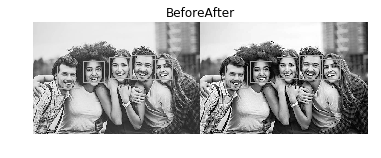

In [10]:
#Sample of normalized intensity
face_bw = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
face_bw_eq = cv2.equalizeHist(face_bw)
plt_show(np.hstack((face_bw, face_bw_eq)), "Before"     "After")

In [11]:
def cut_face_rectangle(img, face_coord):
    # Cuts the image to just show the face.
    images_rectangle = []
    for (x, y, w, h) in face_coord:
        images_rectangle.append(img[y: y + h, x: x + w])
    return images_rectangle




In [12]:
from IPython import display 
try:
    while True:
        frame = image
        faces_coord = detector.detectMultiScale(image, scaleFactor= scale_factor, minNeighbors = min_neighbours, minSize = min_size , flags=flags)
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        if (len(faces_coord)):
            faces = normalize_intensity(gray)
            faces = cut_face_rectangle(gray, faces_coord)
            plt_show(faces[0])
            #plt_show(faces[1])
            #plt_show(faces[2])
            display.clear_output(wait=True)
except KeyboardInterrupt:
    print("InterruptOccurred")

InterruptOccurred
